<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/SepsisMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('feature_combined.csv')

In [ ]:
df.head().T

,0,1,2,3,4
X_0,1.500000,2.227147,4.000000,0.000000,4.000000
X_1,140.000000,140.000000,140.000000,138.000000,140.000000
X_2,138.000000,138.250000,138.500000,138.000000,138.500000
X_3,137.000000,137.000000,138.000000,138.000000,138.000000
X_4,1.414214,1.129338,2.000000,0.000000,2.000000
...,...,...,...,...,...
X_103,0.015385,0.006593,-0.001099,-0.027473,-0.037363
X_104,0.650444,0.650444,0.776250,1.235168,1.281025
offset,-660.000000,-655.000000,-650.000000,-645.000000,-640.000000
id,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 65.8 MB


In [ ]:
df.nunique()

X_0       1372
X_1        137
X_2        513
X_3        135
X_4       1841
          ... 
X_103     1147
X_104     4182
offset     133
id         600
label        2
Length: 108, dtype: int64

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X_0,79800.0,0.155129,3.047073,-6.000000,-1.289256,0.00000,2.602498,4.000000
X_1,79800.0,89.397506,20.258613,0.000000,75.000000,88.00000,102.000000,177.000000
X_2,79800.0,87.264355,19.951703,0.000000,72.750000,85.50000,99.750000,177.000000
X_3,79800.0,85.344023,19.978456,0.000000,71.000000,84.00000,98.000000,177.000000
X_4,79800.0,0.145070,1.102048,-2.000000,-0.228728,0.00000,0.854563,2.000000
...,...,...,...,...,...,...,...,...
X_103,79800.0,0.000516,0.100430,-2.241758,-0.029670,0.00000,0.030769,2.209890
X_104,79800.0,2.405792,2.542446,0.000000,1.068188,1.83275,3.004270,50.647474
offset,79800.0,-330.000000,191.964741,-660.000000,-495.000000,-330.00000,-165.000000,0.000000
id,79800.0,300.500000,173.205925,1.000000,150.750000,300.50000,450.250000,600.000000


In [ ]:
df["label"].value_counts()

1    39900
0    39900
Name: label, dtype: int64

In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .80)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((63840, 107), (63840,)), ((15960, 107), (15960,)))

In [ ]:
df1 = df.loc[df['offset'] == 0]

In [ ]:
df1.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
132,-1.200000,127,125.50,124,0.000000,0.20,1.290994,-0.056816,127,124.857143,...,1.772306,19,16.923077,16,1.085143,0.028571,0.862316,0,1,1
265,4.000000,86,85.25,85,2.000000,-0.02,0.500000,-1.317901,90,86.857143,...,-0.707671,20,15.846154,13,0.634795,-0.054945,2.409915,0,2,1
398,4.000000,106,105.25,105,2.000000,0.02,0.500000,3.000000,106,105.000000,...,0.060937,32,30.307692,28,-0.722135,0.012088,1.109400,0,3,1
531,-3.109816,105,98.75,94,0.456508,-0.14,5.188127,-0.077303,105,96.285714,...,-1.039498,21,16.615385,14,0.449215,0.078022,2.433737,0,4,1
664,0.000000,77,77.00,77,0.000000,0.00,0.000000,7.000000,77,76.857143,...,1.798440,23,16.076923,11,0.845429,-0.015385,2.985005,0,5,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 510.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("label", axis=1), df1["label"], test_size=0.2, random_state=42)

**Logestic Regression**

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

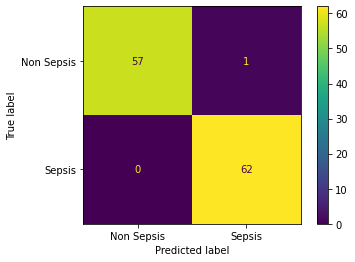

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

array([1. , 0. , 0. , 1. , 1. , 0.6, 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. ,
       0.8, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 1. ,
       1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.2, 0. , 0. ,
       1. , 0. , 0. , 1. , 0.4, 0.2, 1. , 0. , 0. , 0. , 0. , 0.2, 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 0.6, 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0. ,
       1. , 0. , 1. , 0.8, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. ])

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

True     63
False    57
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 120)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    67
0    53
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

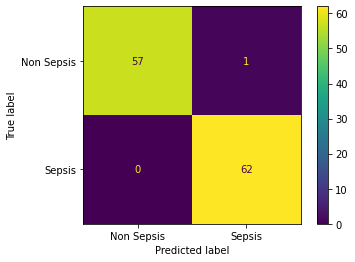

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

**Random Forest**

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

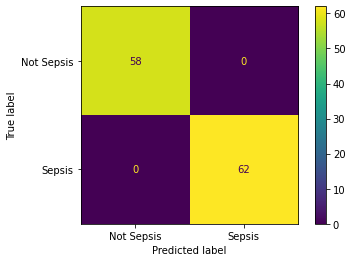

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 1.0'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 1.0'

**MLP**

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

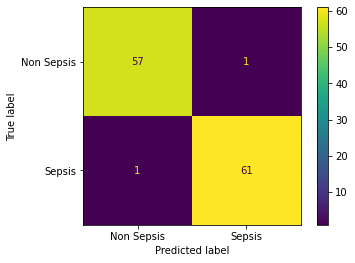

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 1
True Positives: 61



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9833333333333333'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.9838709677419355'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.016129032258064516'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9827586206896551'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9838709677419355'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9833147942157954'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9838709677419355'

**Temporal Training and Testing**


In [8]:
import pandas as pd

In [9]:
df['offset'] = df ['offset']*-1

In [10]:
print (df['offset'])

0        660
1        655
2        650
3        645
4        640
        ... 
79795     20
79796     15
79797     10
79798      5
79799      0
Name: offset, Length: 79800, dtype: int64


In [11]:
offset = df['offset']

In [12]:
def convert(offset):
   
    hour = offset // 60
    
    return "%d" % (hour)
     
# Driver program
n = 660
print(convert(n))

11


In [13]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [18]:
WINDOW_SIZE = 60
X1, y1 = df_to_X_y(offset, WINDOW_SIZE)
X1.shape, y1.shape

((79740, 60, 1), (79740,))

In [19]:
X_train1, y_train1 = X1[:63000], y1[:63000]
X_val1, y_val1 = X1[63000:79740], y1[63000:79740]
X_test1, y_test1 = X1[79740:], y1[79740:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((63000, 60, 1), (63000,), (16740, 60, 1), (16740,), (0, 60, 1), (0,))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((60, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [24]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [25]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1968/1969 [============================>.] - ETA: 0s - loss: 140855.3281 - root_mean_squared_error: 375.3070

1969/1969 [==============================] - 67s 33ms/step - loss: 140859.6250 - root_mean_squared_error: 375.3127 - val_loss: 133426.9688 - val_root_mean_squared_error: 365.2766
Epoch 2/10
1969/1969 [==============================] - ETA: 0s - loss: 124022.6797 - root_mean_squared_error: 352.1685

1969/1969 [==============================] - 65s 33ms/step - loss: 124022.6797 - root_mean_squared_error: 352.1685 - val_loss: 113985.4219 - val_root_mean_squared_error: 337.6173
Epoch 3/10
1969/1969 [==============================] - ETA: 0s - loss: 103701.4531 - root_mean_squared_error: 322.0271

1969/1969 [==============================] - 66s 33ms/step - loss: 103701.4531 - root_mean_squared_error: 322.0271 - val_loss: 92911.0312 - val_root_mean_squared_error: 304.8131
Epoch 4/10
1968/1969 [============================>.] - ETA: 0s - loss: 82379.1641 - root_mean_squared_error: 287.0177

1969/1969 [==============================] - 66s 33ms/step - loss: 82364.6641 - root_mean_squared_error: 286.9924 - val_loss: 71668.9844 - val_root_mean_squared_error: 267.7106
Epoch 5/10
1969/1969 [==============================] - ETA: 0s - loss: 61146.1562 - root_mean_squared_error: 247.2775

1969/1969 [==============================] - 66s 34ms/step - loss: 61146.1562 - root_mean_squared_error: 247.2775 - val_loss: 50820.1367 - val_root_mean_squared_error: 225.4332
Epoch 6/10
1968/1969 [============================>.] - ETA: 0s - loss: 41834.1055 - root_mean_squared_error: 204.5339

1969/1969 [==============================] - 66s 33ms/step - loss: 41823.7383 - root_mean_squared_error: 204.5085 - val_loss: 33164.0391 - val_root_mean_squared_error: 182.1100
Epoch 7/10
1969/1969 [==============================] - ETA: 0s - loss: 25972.9629 - root_mean_squared_error: 161.1613

1969/1969 [==============================] - 66s 33ms/step - loss: 25972.9629 - root_mean_squared_error: 161.1613 - val_loss: 19388.5117 - val_root_mean_squared_error: 139.2426
Epoch 8/10
1969/1969 [==============================] - ETA: 0s - loss: 14450.7393 - root_mean_squared_error: 120.2112

1969/1969 [==============================] - 66s 33ms/step - loss: 14450.7393 - root_mean_squared_error: 120.2112 - val_loss: 10056.2422 - val_root_mean_squared_error: 100.2808
Epoch 9/10
1968/1969 [============================>.] - ETA: 0s - loss: 6711.4570 - root_mean_squared_error: 81.9235

1969/1969 [==============================] - 66s 34ms/step - loss: 6710.7222 - root_mean_squared_error: 81.9190 - val_loss: 4250.5034 - val_root_mean_squared_error: 65.1959
Epoch 10/10
1969/1969 [==============================] - ETA: 0s - loss: 2829.5227 - root_mean_squared_error: 53.1933

1969/1969 [==============================] - 66s 34ms/step - loss: 2829.5227 - root_mean_squared_error: 53.1933 - val_loss: 1711.4456 - val_root_mean_squared_error: 41.3696


In [26]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [27]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,359.235199,360
1,355.001984,355
2,350.661530,350
3,346.216095,345
4,341.668793,340
...,...,...
62995,532.136902,595
62996,532.124939,590
62997,532.108765,585
62998,532.088623,580


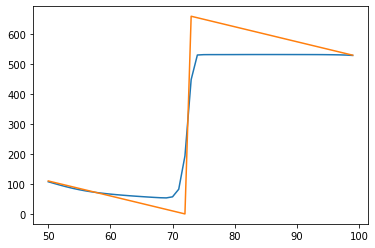

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [29]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,532.033264,570
1,531.993286,565
2,531.937683,560
3,531.855530,555
4,531.660828,550
...,...,...
16735,54.049786,20
16736,53.476856,15
16737,57.050941,10
16738,82.446793,5


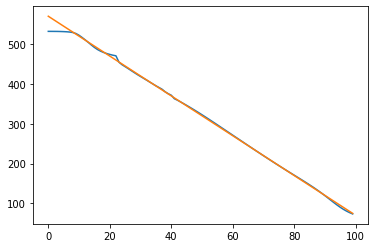

In [30]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [92]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

ValueError: ignored

In [34]:
model2 = Sequential()
model2.add(InputLayer((60, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 59, 64)            192       
                                                                 
 flatten_1 (Flatten)         (None, 3776)              0         
                                                                 
 dense_10 (Dense)            (None, 8)                 30216     
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 30,417
Trainable params: 30,417
Non-trainable params: 0
_________________________________________________________________


In [35]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [36]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1969/1969 [==============================] - 8s 4ms/step - loss: 5696.3438 - root_mean_squared_error: 75.4741 - val_loss: 3177.9736 - val_root_mean_squared_error: 56.3735
Epoch 2/10
1969/1969 [==============================] - 7s 4ms/step - loss: 2921.5522 - root_mean_squared_error: 54.0514 - val_loss: 2779.1628 - val_root_mean_squared_error: 52.7178
Epoch 3/10
1969/1969 [==============================] - 7s 3ms/step - loss: 2753.5249 - root_mean_squared_error: 52.4740 - val_loss: 2649.3726 - val_root_mean_squared_error: 51.4721
Epoch 4/10
1969/1969 [==============================] - 7s 4ms/step - loss: 2550.5657 - root_mean_squared_error: 50.5031 - val_loss: 2386.6919 - val_root_mean_squared_error: 48.8538
Epoch 5/10
1969/1969 [==============================] - 7s 4ms/step - loss: 2284.4861 - root_mean_squared_error: 47.7963 - val_loss: 2076.4832 - val_root_mean_squared_error: 45.5684
Epoch 6/10
1969/1969 [==============================] - 7s 4ms/step - loss: 1992.5521 - ro

In [37]:
model3 = Sequential()
model3.add(InputLayer((60, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [38]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [39]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1969/1969 [==============================] - ETA: 0s - loss: 137497.4219 - root_mean_squared_error: 370.8065

1969/1969 [==============================] - 67s 33ms/step - loss: 137497.4219 - root_mean_squared_error: 370.8065 - val_loss: 126739.7031 - val_root_mean_squared_error: 356.0052
Epoch 2/10
1969/1969 [==============================] - ETA: 0s - loss: 113706.0547 - root_mean_squared_error: 337.2033

1969/1969 [==============================] - 64s 32ms/step - loss: 113706.0547 - root_mean_squared_error: 337.2033 - val_loss: 99874.8359 - val_root_mean_squared_error: 316.0298
Epoch 3/10
1968/1969 [============================>.] - ETA: 0s - loss: 86306.0703 - root_mean_squared_error: 293.7790

1969/1969 [==============================] - 66s 33ms/step - loss: 86291.1953 - root_mean_squared_error: 293.7536 - val_loss: 72743.1250 - val_root_mean_squared_error: 269.7093
Epoch 4/10
1968/1969 [============================>.] - ETA: 0s - loss: 60038.5234 - root_mean_squared_error: 245.0276

1969/1969 [==============================] - 65s 33ms/step - loss: 60043.2578 - root_mean_squared_error: 245.0373 - val_loss: 46964.6211 - val_root_mean_squared_error: 216.7132
Epoch 5/10
1969/1969 [==============================] - ETA: 0s - loss: 35940.9727 - root_mean_squared_error: 189.5810

1969/1969 [==============================] - 66s 33ms/step - loss: 35940.9727 - root_mean_squared_error: 189.5810 - val_loss: 25938.6289 - val_root_mean_squared_error: 161.0547
Epoch 6/10
1969/1969 [==============================] - ETA: 0s - loss: 18466.9844 - root_mean_squared_error: 135.8933

1969/1969 [==============================] - 66s 33ms/step - loss: 18466.9844 - root_mean_squared_error: 135.8933 - val_loss: 12086.5225 - val_root_mean_squared_error: 109.9387
Epoch 7/10
1969/1969 [==============================] - ETA: 0s - loss: 7838.3193 - root_mean_squared_error: 88.5343

1969/1969 [==============================] - 66s 34ms/step - loss: 7838.3193 - root_mean_squared_error: 88.5343 - val_loss: 4473.7876 - val_root_mean_squared_error: 66.8864
Epoch 8/10
1968/1969 [============================>.] - ETA: 0s - loss: 2593.8140 - root_mean_squared_error: 50.9295

1969/1969 [==============================] - 65s 33ms/step - loss: 2593.2893 - root_mean_squared_error: 50.9244 - val_loss: 1228.5188 - val_root_mean_squared_error: 35.0502
Epoch 9/10
1969/1969 [==============================] - ETA: 0s - loss: 637.9004 - root_mean_squared_error: 25.2567

1969/1969 [==============================] - 66s 34ms/step - loss: 637.9004 - root_mean_squared_error: 25.2567 - val_loss: 255.0756 - val_root_mean_squared_error: 15.9711
Epoch 10/10
1969/1969 [==============================] - ETA: 0s - loss: 129.3369 - root_mean_squared_error: 11.3726

1969/1969 [==============================] - 66s 33ms/step - loss: 129.3369 - root_mean_squared_error: 11.3726 - val_loss: 57.0896 - val_root_mean_squared_error: 7.5558


In [47]:
dataset = pd.get_dummies(df, columns = ['label'])

In [41]:
lab = df['label']

In [59]:
lab_df

,label
0,1
1,1
2,1
3,1
4,1
...,...
79795,0
79796,0
79797,0
79798,0


In [65]:
lab_df = pd.DataFrame({'label':lab})
lab_df['Minutes'] = lab_df.index.map(offset)
lab_df

,label,Minutes
0,1,660
1,1,655
2,1,650
3,1,645
4,1,640
...,...,...
79795,0,20
79796,0,15
79797,0,10
79798,0,5


In [68]:
lab_df['Time sin'] = np.sin(lab_df['Minutes']*(2* np.pi))
lab_df['Time cos'] = np.cos(lab_df['Minutes']*(2* np.pi))
lab_df

,label,Minutes,Time sin,Time cos
0,1,660,-5.879790e-13,1.0
1,1,655,-2.527993e-13,1.0
2,1,650,-3.723669e-13,1.0
3,1,645,-3.718717e-14,1.0
4,1,640,-1.567548e-13,1.0
...,...,...,...,...
79795,0,20,-4.898587e-15,1.0
79796,0,15,-1.077937e-14,1.0
79797,0,10,-2.449294e-15,1.0
79798,0,5,-1.224647e-15,1.0


In [69]:
lab_df = lab_df.drop('Minutes', axis=1)
lab_df.head()

,label,Time sin,Time cos
0,1,-5.879790e-13,1.0
1,1,-2.527993e-13,1.0
2,1,-3.723669e-13,1.0
3,1,-3.718717e-14,1.0
4,1,-1.567548e-13,1.0


In [70]:
def df_to_X_y2(df, window_size=180):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [71]:
X2, y2 = df_to_X_y2(lab_df)
X2.shape, y2.shape

((79620, 180, 3), (79620,))

In [72]:
X2_train, y2_train = X2[:63696], y2[:63696]
X2_val, y2_val = X2[63696:79620], y2[63696:79620]
X2_test, y2_test = X2[79620:], y2[79620:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((63696, 180, 3), (63696,), (15924, 180, 3), (15924,), (0, 180, 3), (0,))

In [73]:
lab_training_mean = np.mean(X2_train[:, :, 0])
lab_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - lab_training_mean) / lab_training_std
  return X

In [74]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([], shape=(0, 180, 3), dtype=float64)

In [81]:
model4 = Sequential()
model4.add(InputLayer((180, 3)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17408     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [82]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [83]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1991/1991 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.1000

1991/1991 [==============================] - 180s 89ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 3.9811e-09 - val_root_mean_squared_error: 6.3096e-05
Epoch 2/10
1991/1991 [==============================] - 170s 85ms/step - loss: 7.8091e-05 - root_mean_squared_error: 0.0088 - val_loss: 4.9200e-09 - val_root_mean_squared_error: 7.0143e-05
Epoch 3/10
1991/1991 [==============================] - ETA: 0s - loss: 6.7364e-05 - root_mean_squared_error: 0.0082

1991/1991 [==============================] - 177s 89ms/step - loss: 6.7364e-05 - root_mean_squared_error: 0.0082 - val_loss: 1.8353e-11 - val_root_mean_squared_error: 4.2841e-06
Epoch 4/10
1991/1991 [==============================] - ETA: 0s - loss: 5.5451e-05 - root_mean_squared_error: 0.0074

1991/1991 [==============================] - 179s 90ms/step - loss: 5.5451e-05 - root_mean_squared_error: 0.0074 - val_loss: 2.6149e-15 - val_root_mean_squared_error: 5.1137e-08
Epoch 5/10
1991/1991 [==============================] - 177s 89ms/step - loss: 4.7085e-05 - root_mean_squared_error: 0.0069 - val_loss: 5.2571e-12 - val_root_mean_squared_error: 2.2928e-06
Epoch 6/10
1991/1991 [==============================] - 175s 88ms/step - loss: 4.0479e-05 - root_mean_squared_error: 0.0064 - val_loss: 2.9635e-11 - val_root_mean_squared_error: 5.4438e-06
Epoch 7/10
1991/1991 [==============================] - 175s 88ms/step - loss: 3.6444e-05 - root_mean_squared_error: 0.0060 - val_loss: 7.0534e-10 - val_root_mean_squared_error: 2.6558e-05
Epoch 8/10
1991/1991 [==============================] - 176s 89ms/step - loss: 3.3404e-05 - root_mean_squared_error: 0.0058 - val_loss: 2.0788e-09 - val_root_mean_squared_error: 4.5594e-05
Epoch 9/10
1991/1991 [==============================] - 175s 88ms/

ValueError: ignored